In [34]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
def shmr_h15(mstel,
             z=0.,
             fstar05 = 0.0357,
             fstarz = 0.026,
             lmstar05 = 11.04,
             mstarz = 0.56,
             betastar = 0.43,
             gammastar = 1.0):

    f1star = fstar05 + (z-0.5)*fstarz
    lm1star = lmstar05 + (z-0.5)*mstarz
    m1star = 10.**lm1star
    
    mrat = mstel/m1star
    
    fstar = 2*f1star/(mrat**(-betastar)+mrat*gammastar)

    return mstel/fstar

def shmr_h15_def(mstel, z=0.):

    return shmr_h15(mstel,
                    z,
                    fstar05 = 0.0357,
                    fstarz = 0.026,
                    lmstar05 = 11.04,
                    mstarz = 0.56,
                    betastar = 0.43,
                    gammastar = 1.0)

def shmr_h15_nomstarevol(mstel, z=0.):

    return shmr_h15(mstel,
                    z,
                    fstar05 = 0.0350,
                    fstarz = 0.026,
                    lmstar05 = 11.05,
                    mstarz = 0.,
                    betastar = 0.40,
                    gammastar = 1.0)

def shmr_h15_noevol(mstel, z=0.):

    return shmr_h15(mstel,
                    z,
                    fstar05 = 0.0340,
                    fstarz = 0.,
                    lmstar05 = 11.07,
                    mstarz = 0.0,
                    betastar = 0.42,
                    gammastar = 1.0)

MW  M_* =   5e+10 M_200=2.13e+12
M31 M_* =   1e+11 M_200=5.56e+12
M87 M_* = 5.5e+11 M_200= 1.2e+14


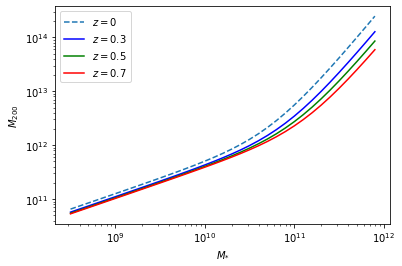

In [39]:
mstel = 10.**(np.arange(8.5,12.,0.1))
mhalo = shmr_h15_def(mstel,z=0.)
plt.loglog(mstel, mhalo, ls='--',label='$z=0$')

combos=zip([0.3,0.5,0.7],['b','g','r'],['$z=0.3$','$z=0.5$','$z=0.7$'])

for z,c,l in combos:
    mhalo = shmr_h15_def(mstel,z=z)
    plt.loglog(mstel, mhalo, c=c,label=l)
    
plt.xlabel(r"$M_{*}$")
plt.ylabel(r"$M_{200}$")
plt.legend()
plt.savefig("mstel_mhalo_h15")

mstel = 5.0e10
print('MW  M_* ={:8.3g} M_200={:8.3g}'.format(mstel, shmr_h15_def(mstel,z=0.)))

mstel=1.e11
print('M31 M_* ={:8.3g} M_200={:8.3g}'.format(mstel, shmr_h15_def(mstel,z=0.)))

mstel=5.5e11
print('M87 M_* ={:8.3g} M_200={:8.3g}'.format(mstel, shmr_h15_def(mstel,z=0.)))
